第三章做過KNN來分類鳶尾花，到目前為止我們所學習到的機器演算法都能有相當不錯的預測結果，但始終可惜的是，我們並不曉得這些演算法是如何做預測的，它的判斷準則又是什麼？對人類而言，我們想知道的不僅是結果，更想知道判斷的準則是什麼。這種可以內化和推理的知識，可以幫助我們解決未來類似的問題。機器學習裡能夠產生判斷準則的演算法叫做決策樹。

#載入鳶尾花資料

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

#建立訓練與測試資料集

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target)  

##決策樹的訓練

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
clf = DecisionTreeClassifier()

In [5]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
clf.score(X_test,y_test)

0.9736842105263158

##決策樹的視覺化

In [7]:
from sklearn.tree import export_graphviz

In [8]:
dot_data = export_graphviz(clf,feature_names=iris.feature_names,class_names=iris.target_names)

In [9]:
print(dot_data)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal length (cm) <= 2.6\ngini = 0.666\nsamples = 112\nvalue = [40, 37, 35]\nclass = setosa"] ;
1 [label="gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]\nclass = versicolor"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]\nclass = versicolor"] ;
2 -> 3 ;
4 [label="petal width (cm) <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica"] ;
4 -> 6 ;
7 [label="petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virgin

In [10]:
import pydotplus
from IPython.display import Image

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png")

True

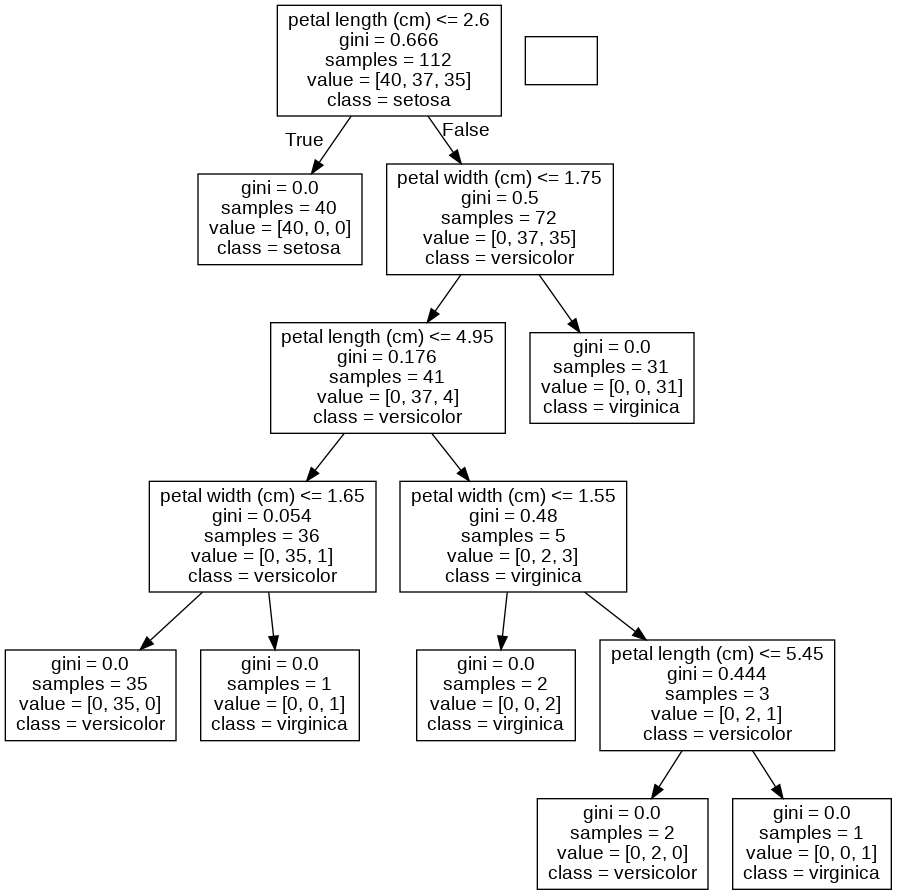

In [12]:
Image(filename="tree.png")

#討論

比較KNN與演算法與決策數演算法

KNN

TREE

WHY?

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df = pd.DataFrame(X_train, columns=iris.feature_names)
df["class"] = y_train
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.8,2.7,5.1,1.9,2
1,5.9,3.0,5.1,1.8,2
2,6.6,2.9,4.6,1.3,1
3,6.0,2.2,5.0,1.5,2
4,4.9,2.5,4.5,1.7,2
...,...,...,...,...,...
107,6.9,3.2,5.7,2.3,2
108,6.0,2.7,5.1,1.6,1
109,4.5,2.3,1.3,0.3,0
110,6.3,3.3,6.0,2.5,2


In [15]:
clf.feature_importances_

array([0.        , 0.        , 0.57394635, 0.42605365])

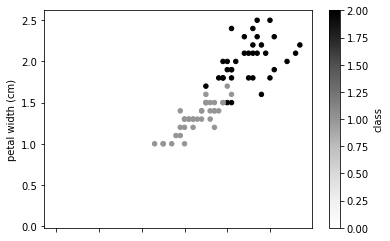

In [16]:
df.plot.scatter(2,3,c=4)